# Descifrando el rendimiento académico: Análisis mediante aprendizaje automático

## Introducción

## Carga de datos

In [1]:
import pandas as pd
# Cargamos el dataset
datos_estudiantes = pd.read_csv("Exam_Score_Prediction.csv", sep=',', index_col="student_id")
datos_estudiantes.head()

c:\Users\juanr\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\juanr\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\juanr\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
student_id,,,,,,,,,,,,
1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


## Funciones

In [2]:
import tensorflow as tf

def preprocesamiento_calificaciones(datos_estudiantes):
    if datos_estudiantes['mark']=='failed':
        m=0
    elif datos_estudiantes['mark']=='passed':
        m=1
    elif datos_estudiantes['mark']=='good':
        m=2
    elif datos_estudiantes['mark']=='merit':
        m=3
    else:
        m=4
    datos_estudiantes['mark']=m
    return datos_estudiantes

def calculo_calificacion_estudiante(estudiante):
    if (estudiante.loc['exam_score']<50.00):
        return 'failed'
    elif (estudiante.loc['exam_score']<60.00):
        return 'passed'
    elif (estudiante.loc['exam_score']<70.00):
        return 'good'
    elif (estudiante.loc['exam_score']<90.00):
        return 'merit'
    else:
        return 'Excellent'

def compila_modelo(modelo, optimizer, lr=1e-3):
    opt = optimizer(learning_rate=lr)
    modelo.compile(
        optimizer=opt,
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[
            tf.keras.metrics.RootMeanSquaredError,
        ]
    )
    return modelo

def entrena_y_evalua(modelo, X_train, y_train, X_val, y_val, X_test, y_test,
                     epochs=80, batch_size=256, callbacks=None, verbose=0):
    history = modelo.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks or [],
        verbose=verbose
    )

    # Evaluación final en test
    _, test_rmse = modelo.evaluate(X_test, y_test, verbose=0)

    return history, test_rmse

def plot_history(history, titulo="Entrenamiento"):
    h = history.history
    epochs = np.arange(1, len(h["loss"]) + 1)

    # Loss
    plt.figure(figsize=(12, 5))
    plt.grid(True)
    plt.plot(epochs, h["loss"], "--", linewidth=2, label="loss train")
    plt.plot(epochs, h["val_loss"], "-", linewidth=2, label="loss val")
    plt.title(titulo + " | Loss")
    plt.xlabel("Época")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure(figsize=(12, 5))
    plt.grid(True)
    plt.plot(epochs, h["root_mean_squared_error"], "--", linewidth=2, label="RMSE train")
    plt.plot(epochs, h["val_root_mean_squared_error"], "-", linewidth=2, label="RMSE val")
    plt.title(titulo + " | RMSE")
    plt.xlabel("Época")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

def plot_pred(y_real, y_pred):
    errores = np.abs(y_real - y_pred)

    fig, ax1 = plt.subplots(1, 1, figsize=(14, 6))
    sc = ax1.scatter(y_real, y_pred, c=errores, cmap='Reds', s=100, edgecolors='k')
    ax1.plot([0, 100], [0, 100], 'k--', alpha=0.5, label='Predicción Perfecta')

    ax1.set_title('Precisión General del Modelo', fontsize=14)
    ax1.set_xlabel('Nota Real', fontsize=12)
    ax1.set_ylabel('Nota Predicha', fontsize=12)
    ax1.set_xlim(0, 105)
    ax1.set_ylim(0, 105)
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    cbar = plt.colorbar(sc, ax=ax1)
    cbar.set_label('Magnitud del Error')

    plt.show()

## Preparado de los datos

In [3]:
#Creamos un atributo para saber si han aprobado
datos_estudiantes['passed']=datos_estudiantes['exam_score']>=50.00

datos_estudiantes['mark']=datos_estudiantes.apply(lambda datos_estudiantes:calculo_calificacion_estudiante(datos_estudiantes), axis=1)

datos_estudiantes = datos_estudiantes.apply(preprocesamiento_calificaciones, axis=1)

datos_estudiantes.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,passed,mark
student_id,,,,,,,,,,,,,,
1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9,True,1
2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8,True,1
3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3,True,4
4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7,False,0
5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7,False,0


In [4]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
gender_encoder.fit(datos_estudiantes['gender'])
datos_estudiantes['gender'] = gender_encoder.transform(datos_estudiantes['gender'])
print("Codificamos el género")
print(list(gender_encoder.classes_))
print(gender_encoder.transform(gender_encoder.classes_))

course_encoder = LabelEncoder()
course_encoder.fit(datos_estudiantes['course'])
datos_estudiantes['course'] = course_encoder.transform(datos_estudiantes['course'])
print("\nCourse codification")
print(list(course_encoder.classes_))
print(course_encoder.transform(course_encoder.classes_))

internet_access_encoder = LabelEncoder()
internet_access_encoder.fit(datos_estudiantes['internet_access'])
datos_estudiantes['internet_access'] = internet_access_encoder.transform(datos_estudiantes['internet_access'])
print("\nCourse codification")
print(list(internet_access_encoder.classes_))
print(internet_access_encoder.transform(internet_access_encoder.classes_))

sleep_quality_encoder = LabelEncoder()
sleep_quality_encoder.fit(datos_estudiantes['sleep_quality'])
datos_estudiantes['sleep_quality'] = sleep_quality_encoder.transform(datos_estudiantes['sleep_quality'])
print("\nSleep Quality codification")
print(list(sleep_quality_encoder.classes_))
print(sleep_quality_encoder.transform(sleep_quality_encoder.classes_))

study_method_encoder = LabelEncoder()
study_method_encoder.fit(datos_estudiantes['study_method'])
datos_estudiantes['study_method'] = study_method_encoder.transform(datos_estudiantes['study_method'])
print("\nStudy Method codification")
print(list(study_method_encoder.classes_))
print(study_method_encoder.transform(study_method_encoder.classes_))

facility_rating_encoder = LabelEncoder()
facility_rating_encoder.fit(datos_estudiantes['facility_rating'])
datos_estudiantes['facility_rating'] = facility_rating_encoder.transform(datos_estudiantes['facility_rating'])
print("\nFacility Rating codification")
print(list(facility_rating_encoder.classes_))
print(facility_rating_encoder.transform(facility_rating_encoder.classes_))

exam_difficulty_encoder = LabelEncoder()
exam_difficulty_encoder.fit(datos_estudiantes['exam_difficulty'])
datos_estudiantes['exam_difficulty'] = exam_difficulty_encoder.transform(datos_estudiantes['exam_difficulty'])
print("\nExam Difficulty codification")
print(list(exam_difficulty_encoder.classes_))
print(exam_difficulty_encoder.transform(exam_difficulty_encoder.classes_))

passed_encoder = LabelEncoder()
passed_encoder.fit(datos_estudiantes['passed'])
datos_estudiantes['passed'] = passed_encoder.transform(datos_estudiantes['passed'])
print("\nExam Difficulty codification")
print(list(passed_encoder.classes_))
print(passed_encoder.transform(passed_encoder.classes_))

datos_estudiantes.head()

Codificamos el género
['female', 'male', 'other']
[0 1 2]

Course codification
['b.com', 'b.sc', 'b.tech', 'ba', 'bba', 'bca', 'diploma']
[0 1 2 3 4 5 6]

Course codification
['no', 'yes']
[0 1]

Sleep Quality codification
['average', 'good', 'poor']
[0 1 2]

Study Method codification
['coaching', 'group study', 'mixed', 'online videos', 'self-study']
[0 1 2 3 4]

Facility Rating codification
['high', 'low', 'medium']
[0 1 2]

Exam Difficulty codification
['easy', 'hard', 'moderate']
[0 1 2]

Exam Difficulty codification
[False, True]
[0 1]


,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,passed,mark
student_id,,,,,,,,,,,,,,
1,17,1,6,2.78,92.9,1,7.4,2,0,1,1,58.9,1,1
2,23,2,5,3.37,64.8,1,4.6,0,3,2,2,54.8,1,1
3,22,1,1,7.88,76.8,1,8.5,2,0,0,2,90.3,1,4
4,20,2,6,0.67,48.4,1,5.8,0,3,1,2,29.7,0,0
5,20,0,6,0.89,71.6,1,9.8,2,0,1,2,43.7,0,0


## Visualizacion previa

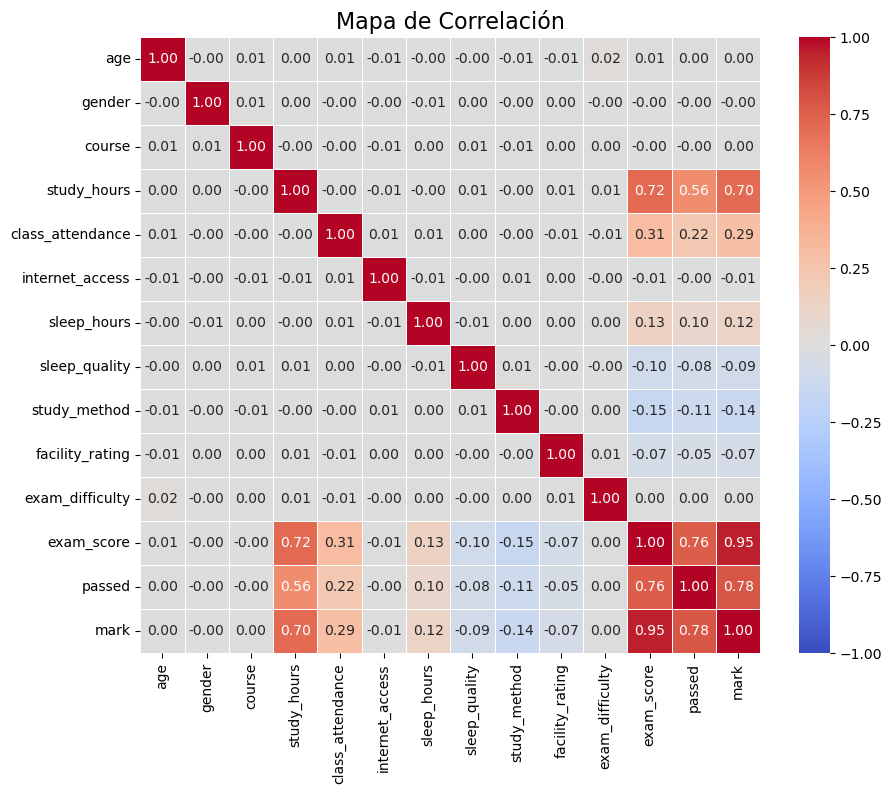

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

matriz_correlacion = datos_estudiantes.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Mapa de Correlación', fontsize=16)
plt.show()

## Regresión

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().set_output(transform="pandas")
y_scaler = MinMaxScaler().set_output(transform="pandas")

X = datos_estudiantes.drop(['exam_score', 'passed', 'mark'], axis=1)
y = datos_estudiantes['exam_score']

X_scaled, y_scaled = X_scaler.fit_transform(X), y_scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y_scaled, test_size=0.30, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

### Metodos clasicos

#### Regresión Lasso

Como primera aproximación para predecir el rendimiento académico, se seleccionó el algoritmo de Regresión Lasso. La motivación para seleccionar este algoritmo es su capacidad para identificar desde un inicio cuáles de las variables estandarizadas tienen un impacto real en la predicción y cuáles actúan únicamente como ruido o fuente de error, ya que al desestimar las variables que influyen de forma vaga o errónea en la predicción, mejoramos esta considerablemente. Para la optimización del parámetro $\alpha$ se ha empleado GridSearch entre una selección de valores, además de establecer en 10.000 el máximo de iteraciones para asegurar la convergencia del algoritmo. Para evaluar el modelo, consideraremos las métricas R2, MSE y RMSE, además de extraer las variables más importantes y el número de variables que se mantienen con un peso distinto de 0.

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 10]}
grid_lasso = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='r2')
grid_lasso.fit(X_train, y_train)

#Resultados del mejor modelo
best_alpha = grid_lasso.best_params_['alpha']
best_model = grid_lasso.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Mejor Alpha: {best_alpha}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R2: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
coefs = pd.Series(best_model.coef_, index=X_train.columns)
print(f"Variables mantenidas: {len(coefs[coefs != 0])}")
top3variables = coefs.nlargest(3).index.tolist()
print(f"Top 3 variables: {top3variables}")

Mejor Alpha: 0.0001
MSE: 0.0181
R2: 0.6739
RMSE: 0.1345
Variables mantenidas: 10
Top 3 variables: ['study_hours', 'class_attendance', 'sleep_hours']


La configuración óptima del modelo según la búsqueda del mejor valor de $\alpha$ resula ser 0.0001, un valor bastante bajo, esto nos indica que la mayoría de las variables tienen una relación relevante con la variable objetivo y no exigen una gran penalización por parte del algoritmo. Esto se demuestra al comprobar que 10 han sido las variables seleccionadas, por lo que solo 1 ha quedado anulada.

Para esta configuración hemos obtenido los siguientes valores para las métricas seleccionadas:
- R²: 0.6739. El modelo es capaz de explicar aproximadamente el 67% de variabilidad de las notas de los alumnos, un resultado bastante positivo.
- MSE: 0.0181. El Error Cuadrático Medio es notablemente bajo, lo cual es un resultado muy satisfactorio.
- RMSE: 0.1345. La Raíz del Error Cuadrático Medio nos indica que la desviación de las predicciones es únicamente de 0.13 unidades, por lo que las predicciones serán altamente fiables.

El modelo ha identificado los tres atributos que más influyen en el éxito académico, siendo estos los siguientes: horas de estudio, la atención en clase y la calidad del sueño.

#### Árbol de Decisión (Decision Tree Regressor)

En segundo lugar se plantea un modelo de Árbol de Decisión. Este algoritmo nos permite descubrir relaciones no lineales y dependencias complejas entre las diferentes variables del conjunto de datos, todo ello sin asumir una distribución específica de los datos. Para ajustar debidamente los parámetros del modelo, se ha implementado una GridSearch para los parámetros profundidad máxima, mínimo de muestras necesarias para dividir un nodo y mínimo de muestras para considerar un nodo como hoja. Para evaluar el modelo, consideraremos las métricas R2, MSE y RMSE, además de extraer las variables más importantes.

In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [None, 5, 10, 15, 20], #profundidad del árbol (para evitar overfitting)
    'min_samples_split': [2, 5, 10], #muestras mínimas para dividir un nodo
    'min_samples_leaf': [1, 2, 4] #número mínimo de muestras que debe tener un nodo hoja
}

grid_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_tree.fit(X_train, y_train)

best_params = grid_tree.best_params_
best_model_tree = grid_tree.best_estimator_
y_pred_tree = best_model_tree.predict(X_test)

print(f"Mejores Parámetros: {best_params}")
print(f"MSE: {mean_squared_error(y_test, y_pred_tree):.4f}")
print(f"R2: {r2_score(y_test, y_pred_tree):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tree)):.4f}")

#Top 3 variables más importantes
importancias = pd.Series(best_model_tree.feature_importances_, index=X_train.columns) #Importancia de las variables 
top3variables_tree = importancias.nlargest(3).index.tolist()
print(f"Top 3 variables: {top3variables_tree}")

Mejores Parámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
MSE: 0.0210
R2: 0.6218
RMSE: 0.1448
Top 3 variables: ['study_hours', 'class_attendance', 'sleep_quality']


La configuración óptima del modelo según la búsqueda de parámetros es la siguiente: profundidad máxima (10), mínimo de muestras necesarias para dividir un nodo (10), mínimo de muestras para considerar un nodo como hoja (4). Para esta configuración hemos obtenido los siguientes valores para las métricas seleccionadas:
- R²: 0.6218. El modelo es capaz de explicar aproximadamente el 62% de variabilidad de las notas de los alumnos, lo cual es un resultado aceptable.
- MSE: 0.0210. El Error Cuadrático Medio es notablemente bajo, por lo que el resultado es satisfactorio.
- RMSE: 0.1448. La Raíz del Error Cuadrático Medio nos indica que la desviación de las predicciones respecto del valor real es muy reducido por lo que el modelo realiza buenas predicciones.

Este algoritmo cuenta con una gran ventaja, la capacidad para evaluar la importancia de las variables del conjunto de datos, dado que asigna pesos a cada variable según su capacidad para reducir el error en cada división del árbol. A raíz de esto se han obtenido las 3 variables consideradas más importantes, siendo estas las horas de estudio, la atención en clase y la calidad del sueño.

#### Combinación de Regresión Lineal y Análisis de Componentes Principales (PCA)

Se plantea el uso de una combinación de regresión lineal y PCA, con varios objetivos. El PCA en primer lugar, mediante la simplificación del modelo nos permite plasmar el conjunto de datos en un plano bidimensional, algo de mucha utilidad para visualizar el la linea de tendencia de los datos y compararla con la recta resultante del regresor. Por otro lado, al transformar las variables originales en componentes ortogonales, podríamos eliminar correlaciones internas que pudiesen desestabilizar los coeficientes de la regresión. 

In [14]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Información de relevancia
print(f'Ratio varianza explicada: ',pca.explained_variance_ratio_) #cantidad de varianza explicada por componentes principales

Ratio varianza explicada:  [0.13484881 0.11840278]


Tras aplicar PCA y previamente a realizar la regresión, se evaluó la Varianza Explicada Acumulada para las componentes principales. El resultado fue de un 13.5% para la primera componente y un 11.8% para la segunda, siendo la suma de estas un 25.3% total. Este valor nos indica que casi el 75% de la información es original se descarta, es decir, el modelo 2D se construye sobre una base de información compuesta únicamente por un cuarto de la información original. Este suceso se debe a que la correlación entre la mayoría de las variables es cercana a 0, por tanto no es posible reducir la dimensionalidad sin perder información por el camino. Construir un modelo con solo estas 2 componentes resultaría en una regresión lineal con una capacidad predictiva muy limitada. Concluimos así que el PCA no es una técnica adecuada para este dataset.